# Problem 16.4: Shower

In this problem two models of a shower tubing system is made for a simulation. The difference between the models is the heat leakage to the suroundings.

##### Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

### Set-up the model

Set the parameter values for the system

In [2]:
phi = 2.e-4
cp = 4200.
L = 10.
d = 0.01
rho = 1.e3
N = 10
Tb = 90 
T0 = 15

Derived values

In [3]:
b = phi/(np.pi * d**2 * L/N)

Construc the State-Space matrices

In [4]:
aa = np.zeros([N,N])
for k in range(N):
    aa[k,k] = -b
    if k != 0:
        aa[k,k-1] = b
bb = np.zeros([N,1])
bb[0] = b
cc = np.eye(N)
dd = np.zeros([N,1])

In [5]:
aa

array([[-0.63661977,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.63661977, -0.63661977,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.63661977, -0.63661977,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.63661977, -0.63661977,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.63661977, -0.63661977,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.63661977,
        -0.63661977,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.63661977, -0.63661977,  0.        

Calculate the eigenvalues to determining the stability of the system.

In [6]:
np.linalg.eigvals(aa)

array([-0.63661977, -0.63661977, -0.63661977, -0.63661977, -0.63661977,
       -0.63661977, -0.63661977, -0.63661977, -0.63661977, -0.63661977])

Construct the State-Space Model:

In [7]:
sys1 = sig.StateSpace(aa,bb,cc,dd)

Define the initial conditions

In [8]:
T00 = np.zeros(N)
for i in range(N): 
    T00 = T0

Define the input signal (step function) and calculate the output singal for every section.

In [9]:
t1 = np.linspace(0., 40, num=200)
u1 = Tb*np.ones_like(t1)
tout1, y1, x1 = sig.lsim(sys1, u1, t1, X0=T0)

Plot the results

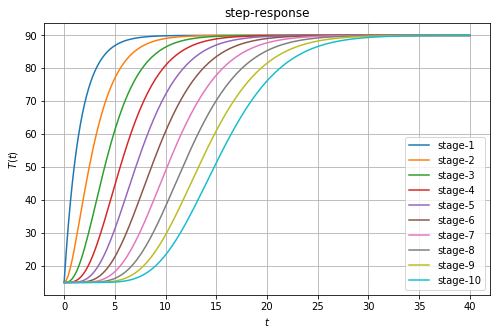

In [10]:
plt.figure(figsize=(8,5))
for n in range(N): 
    plt.plot(t1, y1[:,n],label="stage-{0}".format(n+1))
plt.xlabel (r'$t$')
plt.ylabel (r'$T(t)$')
plt.legend()
plt.title('step-response')
plt.grid(True)
plt.show()

##### Results and analysis

All sections of the tubing reach the final temperature. The difference between the sections is the time-lag. The further away from the source, the later the section of the tube gets the final temperature. 
The fact that all sections reach the final temperature of the incoming water is due to the fact that there are no heat losses.

#### New model: leak added to tubing

Give the heat leakage a value

In [11]:
alpha = 1.e3
a = alpha/(np.pi * d * rho * cp)

Construct the State-Space Matrices again, incorporating the heat flow to the suroundings.

In [12]:
aa = np.zeros([N,N])
for k in range(N):
    aa[k,k] = -b
    if k != 0:
        aa[k,k] = -b-a
        aa[k,k-1] = b
bb = np.zeros([N,2])
bb[0,0] = b
bb[:,1] = a
cc = np.eye(N)
dd = np.zeros([N,2])

Calculate the eigenvalues to determining the stability of the system.

In [13]:
np.linalg.eigvals(aa)

array([-0.64419858, -0.64419858, -0.64419858, -0.64419858, -0.64419858,
       -0.64419858, -0.64419858, -0.64419858, -0.64419858, -0.63661977])

Construct the State-Space Model:

In [14]:
sys2 = sig.StateSpace(aa,bb,cc,dd)

Set the initial values of the tempereatures

In [15]:
T00 = np.zeros(N)
for i in range(N): 
    T00[i] = T0

Construct the time and input arrays. (Note that transpose is used to get the two separate arrays in the right orientation).

In [16]:
t2 = np.linspace(0., 40, num=200)
u2 = np.transpose(np.array([Tb*np.ones_like(t2),T0*np.ones_like(t2)]))
tout2, y2, x2 = sig.lsim(sys2, u2, t2, X0=T00)

Now plot the results of the simulation

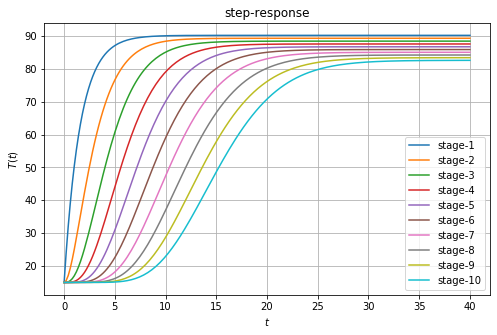

In [17]:
plt.figure(figsize=(8,5))
for n in range(N): 
    plt.plot(t2, y2[:,n],label="stage-{0}".format(n+1))
plt.xlabel (r'$t$')
plt.ylabel (r'$T(t)$')
plt.legend()
plt.title('step-response')
plt.grid(True)
plt.show()

##### Results and analysis

The difference with the pevious simulation is the addition of leakage to the suroundings. The effect is that the further away the tubing is from the source, not only the temperature rise starts later, also the final temperature is lower. This is due to the effect that the input temperature of later sections is lower, due to heat loss.